In [9]:
import turicreate as t

In [10]:
data = t.SFrame("Social_Network_Ads.csv")

Finished parsing file /home/gunjan/Machine_Learning/Social_Network_Ads.csv

Parsing completed. Parsed 100 lines in 0.02191 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/gunjan/Machine_Learning/Social_Network_Ads.csv

Parsing completed. Parsed 400 lines in 0.022384 secs.

In [11]:
data.head()

User ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0
15598044,Female,27,84000,0
15694829,Female,32,150000,1
15600575,Male,25,33000,0
15727311,Female,35,65000,0


In [12]:
data.show()

Materializing SFrame

In [13]:
training_set ,test_set = data.random_split(.8, seed = 0)

In [14]:
model = t.linear_regression.create(training_set,target = 'Purchased',features=['Age'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 305

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 1        | 1.000821     | 1.000000           | 1.000000             | 0.575454                        | 0.654654                          |

| 1         | 2        | 1.075067     | 0.949503           | 0.753176             | 0.375689                        | 0.372206                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [15]:
print (test_set['Purchased'].mean())

0.4444444444444444


In [16]:
print (model.evaluate(test_set))

{'max_error': 0.949503298495967, 'rmse': 0.37395526797424233}


In [17]:
model.coefficients

name,index,value,stderr
(intercept),None,-0.7067640006959305,0.0819584500286861
Age,None,0.02804669267407272,0.0021365300574524076


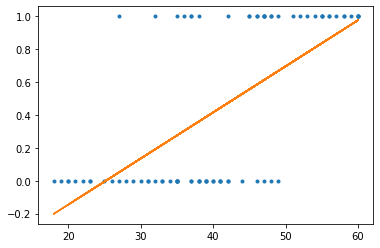

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['Age'],test_set['Purchased'],'.',
        test_set['Age'],model.predict(test_set),'-')

In [19]:
my_features = ['Gender','EstimatedSalary']

In [20]:
data[my_features].show()

Materializing SFrame

In [21]:
t.show(data['Gender'],data['Purchased'])

Materializing X axis SArray

Materializing Y axis SArray

In [22]:
t.show(data['EstimatedSalary'],data['Purchased'])

Materializing X axis SArray

Materializing Y axis SArray

In [23]:
my_features_model = t.linear_regression.create(training_set,target='Purchased',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 305

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 1        | 0.000171     | 1.000000           | 1.000000             | 0.581124                        | 0.534522                          |

| 1         | 2        | 0.000544     | 0.941351           | 0.796912             | 0.436410                        | 0.397653                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [24]:
print (my_features)

['Gender', 'EstimatedSalary']


In [25]:
print (model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 0.949503298495967, 'rmse': 0.37395526797424233}
{'max_error': 0.951452276767375, 'rmse': 0.4961880399616358}


In [47]:
user_id_1 = data[data['User ID'] == "15697686"]

In [48]:
user_id_1

User ID,Gender,Age,EstimatedSalary,Purchased


In [49]:
print (user_id_1['Purchased'])

[, ... ]
